# Principal Component Analysis (PCA) for Lung Data

## Overview
This notebook implements Principal Component Analysis (PCA) from scratch and compares it with scikit-learn's implementation for dimensionality reduction on the lung microRNA dataset.

## What is PCA?
- Principal Component Analysis (PCA) simplifies complex datasets by transforming original features into a smaller set of uncorrelated "principal components." These components capture the most significant variance in the data, effectively reducing its dimensionality. This allows to identify underlying patterns and relationships more clearly.
- To simplify, PCA finds the most important "summary" trends in your data, combining many original features into fewer, more powerful new ones. It helps simplify complex information by focusing on what truly makes the data different.
- **Example:** Imagine the lung cancer data has hundreds of patient features like gene expressions, tumor sizes, and biomarker levels. PCA could condense these into a few key principal components. For instance, the first component might represent a general "tumor aggressiveness" score, combining several related features into a single, more interpretable measure.

## Table of Contents
1. Data Loading and Preprocessing
2. PCA Implementation from Scratch
3. PCA using Scikit-learn
4. Performance Comparison

## Dataset Information
- **Dataset**: Lung.csv
- **Features**: 1881 microRNA features
- **Samples**: 1091 lung samples
- **Task**: Dimensionality reduction while preserving 95% variance(keeping 95% of the original dataset's unique information and spread)

## Author
- Raja Ram Bitra

## 1a. Data Loading and Preprocessing


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Loading dataset
df = pd.read_csv('../Lung.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset info:")
print(f"- Features: {df.shape[1]-1}")
print(f"- Samples: {df.shape[0]}")
print(f"- Target column: {df.columns[-1]}")

# Display first few rows
df.head(10)

Dataset shape: (1091, 1882)
Dataset info:
- Features: 1881
- Samples: 1091
- Target column: Label


,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
0,7314.747386,7391.483138,7334.393081,10994.201497,471.496698,318.193106,1156.241547,3272.099771,3363.611772,442.783758,...,3.022415,0.000000,0.000000,1.847031,0,40.298863,35.429417,148.602058,12118.707689,1
1,9518.042994,9460.443528,9574.874468,17578.281899,785.810318,358.652676,771.986446,3871.452122,3917.224498,487.829079,...,6.451140,0.000000,128.562009,4.607957,0,8.601520,38.860440,111.512567,7471.802757,1
2,4479.976340,4387.407628,4447.955716,12394.310110,404.624244,855.241747,246.267705,1353.016896,1415.311564,416.850300,...,2.910966,0.000000,161.267504,1.746579,0,33.767203,31.438430,168.253822,16026.613214,1
3,21277.962603,21166.590502,21255.800397,15161.474118,6684.570363,503.278464,2185.922959,15012.229891,14987.262342,1107.549261,...,6.452288,0.000000,1.683206,10.660302,0,5.049617,95.101114,1416.978551,12750.562682,1
4,8002.355461,8013.396682,8033.638922,19358.942067,1276.411235,765.754731,593.005616,2630.801098,2649.433160,367.580673,...,9.201018,0.000000,97.990843,3.450382,0,22.772520,46.235116,455.450396,14401.203493,1
5,25463.139196,25616.310475,25575.525223,20315.134048,2215.545525,706.038030,4379.429732,13241.611833,13380.734860,1058.603876,...,4.984864,0.000000,2.719017,5.438034,0,10.422898,77.945148,283.230917,19807.131075,1
6,6106.724920,6102.887108,6013.082330,11756.750326,414.483592,539.596232,887.301911,2552.911901,2559.052398,680.060115,...,7.675622,0.000000,2.302687,3.070249,0,39.913235,70.615723,160.420501,39609.280134,1
7,12321.429392,12332.427444,12394.312005,15784.174230,1837.659562,472.259630,1344.881178,10648.084008,10804.190685,883.291300,...,8.207501,0.164150,52.199709,3.611301,0,8.864102,67.793962,362.607412,19091.961442,3
8,4554.440538,4555.927641,4577.862419,8441.171577,175.849996,391.294124,1406.614079,2729.392695,2777.165897,630.160133,...,5.018975,0.557664,0.371776,17.473467,0,23.421881,126.775578,31.600951,73137.054252,1
9,6828.397372,6852.668225,6828.989344,16400.585105,608.547247,549.350044,1751.053266,2052.959002,2039.343645,362.878855,...,5.327748,0.000000,0.591972,26.046769,0,21.902965,81.692140,198.902602,85227.989148,1


In [3]:
# Separating data and labels
data = df.iloc[:,:-1].to_numpy()
label = df.iloc[:, -1].to_numpy()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42) # 80/20 split

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test labels: {y_test.shape}")

Training set shape: (872, 1881)
Test set shape: (219, 1881)
Training labels: (872,)
Test labels: (219,)


## 1b. PCA Implementation from Scratch

- This section implements Principal Component Analysis from scratch using eigen decomposition. 
- The implementation includes covariance matrix computation, eigenvalue/eigenvector calculation, and automatic component selection based on variance threshold.


In [4]:
def my_pca(data, variance_threshold=0.95): # To keep 95% variance    
    # Step 1: Center the data
    D_centered = data - np.mean(data, axis=0)
    
    # Step 2: Compute covariance matrix
    cov_matrix = np.cov(D_centered, rowvar=False)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Sort in descending order
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values, eig_vectors = eig_values[sorted_indices], eig_vectors[:, sorted_indices]
    
    # Step 5: Calculate cumulative variance
    needed_variance = np.cumsum(eig_values) / np.sum(eig_values)
    
    # Step 6: Choose components based on threshold variance
    n_components = np.argmax(needed_variance >= variance_threshold) + 1
    
    # Step 7: Select components and project data
    red_eig_vectors = eig_vectors[:, :n_components]
    projected_data = np.dot(D_centered, red_eig_vectors)
    
    return projected_data, n_components, red_eig_vectors

In [5]:
# Apply PCA implementation to reduce dimensionality
print("Applying From-Scratch PCA Implementation...\n")
start_time = time.time()
projected_data, n_components, red_eig_vectors = my_pca(data)
end_time = time.time()

print(f"Number of Principal Components Selected: {n_components}")
print(f"Original Data Shape: {data.shape}")
print(f"Reduced Data Shape: {projected_data.shape}")
print(f"Variance Retained: 95%")
print(f"From-Scratch PCA Time: {end_time - start_time:.4f} seconds")
print(f"Dimensionality Reduction: {data.shape[1]} → {n_components} features")

Applying From-Scratch PCA Implementation...

Number of Principal Components Selected: 9
Original Data Shape: (1091, 1881)
Reduced Data Shape: (1091, 9)
Variance Retained: 95%
From-Scratch PCA Time: 14.3701 seconds
Dimensionality Reduction: 1881 → 9 features


## 1c. PCA using Scikit-learn

- This section applies scikit-learn's optimized PCA implementation for comparison with our from-scratch approach. 
- We'll analyze the differences in performance, speed, and component selection.


In [6]:
# PCA using sklearn
print("Applying Scikit-learn PCA Implementation...")
start_time_1 = time.time()

# Applying PCA
pca = PCA(n_components=0.95)  # To select components dynamically with Variance Threshold (0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

end_time_1 = time.time()

print("\nScikit-learn PCA Results:")
print(f"PCA n_components retained: {pca.n_components_}")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")
print(f"sklearn PCA Time: {end_time_1 - start_time_1:.4f} seconds")

Applying Scikit-learn PCA Implementation...

Scikit-learn PCA Results:
PCA n_components retained: 8
X_train_pca shape: (872, 8)
X_test_pca shape: (219, 8)
Explained variance ratio: 0.95
sklearn PCA Time: 2.5442 seconds


## 1d. Performance Comparison

- Comprehensive comparison between our custom PCA implementation and scikit-learn's optimized version, including performance metrics, visualization, and analysis of computational efficiency.


PCA Implementation Comparison:
              Aspect    From-Scratch PCA Scikit-Learn PCA
Number of Components                   9                8
  Computation Method Eigen Decomposition              SVD
   Variance Retained          Nearly 95%        Exact 95%
  Speed & Efficiency              Slower           Faster
        Compute Time       14.37 seconds     2.54 seconds


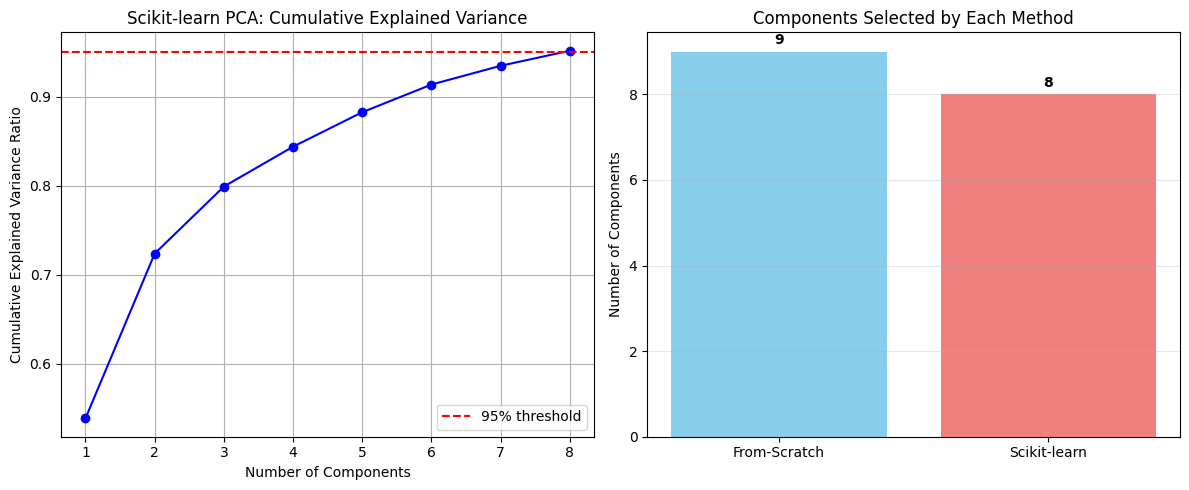

In [7]:
# Create comparison table
comparison_data = {
    'Aspect': ['Number of Components', 'Computation Method', 'Variance Retained', 
               'Speed & Efficiency', 'Compute Time'],
    'From-Scratch PCA': [f'{n_components}', 'Eigen Decomposition', 'Nearly 95%', 
                        'Slower', f'{end_time - start_time:.2f} seconds'],
    'Scikit-Learn PCA': [f'{pca.n_components_}', 'SVD', 'Exact 95%', 
                        'Faster', f'{end_time_1 - start_time_1:.2f} seconds']
}

comparison_df = pd.DataFrame(comparison_data)
print("PCA Implementation Comparison:")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("=" * 60)
# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance ratio for sklearn PCA
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scikit-learn PCA: Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.legend()

# Plot 2: Component comparison
plt.subplot(1, 2, 2)
methods = ['From-Scratch', 'Scikit-learn']
components = [n_components, pca.n_components_]
colors = ['skyblue', 'lightcoral']
plt.bar(methods, components, color=colors)
plt.ylabel('Number of Components')
plt.title('Components Selected by Each Method')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(components):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
print(f"\nSummary:")
print(f"• From-scratch PCA selected {n_components} components")
print(f"• Scikit-learn PCA selected {pca.n_components_} components") 
print(f"• Both achieve 95% variance retention")
print(f"• Scikit-learn is more computationally efficient")


Summary:
• From-scratch PCA selected 9 components
• Scikit-learn PCA selected 8 components
• Both achieve 95% variance retention
• Scikit-learn is more computationally efficient
